In [118]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import random

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import ggplot as R

from functools import reduce
import operator

import jieba.analyse
import jieba
from opencc import OpenCC #ÁπÅÁ∞°ËΩâÊèõ


In [119]:
dirPath = 'C:/Users/danie/OneDrive/Ê°åÈù¢/project data/'
print(os.listdir(dirPath),'\n')
result = [os.listdir(os.path.join(dirPath, f)+'/') for f in os.listdir(dirPath)]
print(result)

['‰∏≠‰ø°', 'ÂúãÊ≥∞', 'ÂØåÈÇ¶', 'ÁéâÂ±±'] 

[['iÁπ≥Ë≤ª(google).csv', 'iÁπ≥Ë≤ª.csv', '‰∏≠‰ø°‰∫ÆÈªû(google).csv', '‰∏≠‰ø°‰∫ÆÈªû.csv', '‰∏≠‰ø°Âç°ÂÑ™ÊÉ†(google).csv', '‰∏≠‰ø°Âç°ÂÑ™ÊÉ†.csv', '‰∏≠‰ø°ÊúçÂãôËÆö(google).csv', '‰∏≠‰ø°ÊúçÂãôËÆö.csv', '‰∏≠‰ø°Ë°åÂãï‰ºÅÊ•≠ÂÆ∂(google).csv', '‰∏≠‰ø°Ë°åÂãï‰ºÅÊ•≠ÂÆ∂.csv', '‰∏≠‰ø°Ë°åÂãïÂà∑Âç°(google).csv', '‰∏≠‰ø°Ë°åÂãïÂà∑Âç°.csv', '‰∏≠Âúã‰ø°Ë®óË°åÂãïÈäÄË°å(google).csv', '‰∏≠Âúã‰ø°Ë®óË°åÂãïÈäÄË°å.csv', '‰∏≠Âúã‰ø°Ë®óË≠âÂà∏-ÈªûÂØåÁéã(google).csv', '‰∏≠Âúã‰ø°Ë®óË≠âÂà∏-ÈªûÂØåÁéã.csv', 'Âè∞ÁÅ£‰∫∫Â£Ω(google).csv', 'Âè∞ÁÅ£‰∫∫Â£Ω.csv'], ['KOKO(google).csv', 'KOKO.csv', 'ÂúãÊ≥∞‰∏ñËèØ Ë°åÂãïÈäÄË°å(google).csv', 'ÂúãÊ≥∞‰∏ñËèØ Ë°åÂãïÈäÄË°å.csv', 'ÂúãÊ≥∞‰∫∫Â£Ω(google).csv', 'ÂúãÊ≥∞‰∫∫Â£Ω.csv', 'ÂúãÊ≥∞ÂÑ™ÊÉ†(google).csv', 'ÂúãÊ≥∞ÂÑ™ÊÉ†.csv', 'ÂúãÊ≥∞Ë≠âÂà∏ eÊ´ÉÂè∞(google).csv', 'ÂúãÊ≥∞Ë≠âÂà∏ eÊ´ÉÂè∞.csv', 'ÂúãÊ≥∞Ë≠âÂà∏ Ê®πÁ≤æÈùà(google).csv', 'ÂúãÊ≥∞Ë≠âÂà∏ Ê®πÁ≤æÈùà.csv', 'ÂúãÊ≥∞Ë≠âÂà∏„ÄåÁ∑ö‰∏äÈñãÊà∂„Äç(google).csv', 'ÂúãÊ≥∞Ë≠âÂà∏„ÄåÁ∑ö‰∏äÈñãÊà∂„Äç.csv', 'ÂúãÊ≥∞Ë≠âÂà∏„Ä

In [120]:
list_of_df=[]
for i in range(4):
    
    company = os.listdir(dirPath)[i]
    
    for data in result[i]:
        df = pd.read_csv(dirPath+company+'/'+data)
        if 'google' in data:
            df = df.drop(['likecounts'], axis=1)
            df['Time'] = df['Time'].apply(lambda x: datetime.strptime(x, "%YÂπ¥%mÊúà%dÊó•").strftime('%Y/%m/%d'))
        else:
            df['Content'] = df['Title']+df['Content']
            df = df.drop(['Title'], axis=1)
            df['Time'] = df['Time'].apply(lambda x: datetime.strptime(x.split('T')[0], "%Y-%m-%d").strftime('%Y/%m/%d'))
        
        df.loc[:,'company'] = company
        df.loc[:,'product'] = data
    
        list_of_df.append(df)

In [121]:
raw_data = pd.concat(list_of_df, ignore_index=True)
raw_data = raw_data[~raw_data['Content'].isna()].reset_index(drop=True)

In [122]:
bar_df = pd.DataFrame(raw_data.groupby(['Star', 'company']).size()).reset_index()
bar_df = bar_df.rename(columns={0:'counts'})
bar_df.head()

Star company  counts
0     1      ‰∏≠‰ø°   12829
1     1      ÂúãÊ≥∞    8746
2     1      ÂØåÈÇ¶    4340
3     1      ÁéâÂ±±    5488
4     2      ‰∏≠‰ø°    2250

In [130]:
x1 = bar_df.loc[bar_df.company=='ÂúãÊ≥∞','Star']
y1 = bar_df.loc[bar_df.company=='ÂúãÊ≥∞','counts']

x2 = bar_df.loc[bar_df.company=='‰∏≠‰ø°','Star']
y2 = bar_df.loc[bar_df.company=='‰∏≠‰ø°','counts']

x3 = bar_df.loc[bar_df.company=='ÁéâÂ±±','Star']
y3 = bar_df.loc[bar_df.company=='ÁéâÂ±±','counts']

x4 = bar_df.loc[bar_df.company=='ÂØåÈÇ¶','Star']
y4 = bar_df.loc[bar_df.company=='ÂØåÈÇ¶','counts']

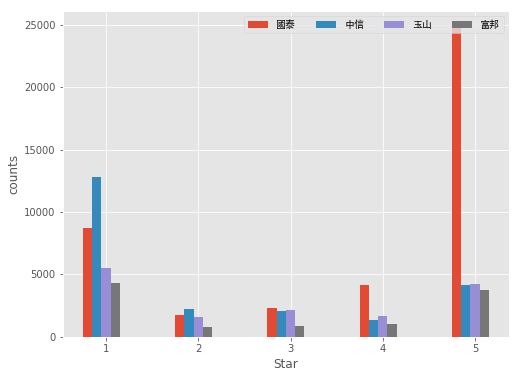

In [142]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
myfont = FontProperties(fname=r'C:\Users\danie\OneDrive\Ê°åÈù¢\SimHei.ttf')

w=0.1
plt.bar(x1-0.2, y1,width=w , align='center', label='ÂúãÊ≥∞')
plt.bar(x2-0.1, y2, width=w ,align='center', label='‰∏≠‰ø°')
plt.bar(x3, y3,width=w , align='center', label='ÁéâÂ±±')
plt.bar(x4+0.1, y4, width=w ,align='center', label='ÂØåÈÇ¶')

plt.xlabel('Star')
plt.ylabel('counts')

plt.legend(prop=myfont, loc="upper right", ncol=4)

In [132]:
raw_data.loc[:,'Content_len'] = raw_data['Content'].apply(lambda x: len(x))
raw_data['dev_content'] = raw_data['dev_content'].apply(lambda x: str(x))

In [133]:
raw_data.loc[(raw_data['dev_content']==' ')|(raw_data['dev_content']=='nan'), 'dev_content']=''

In [134]:
raw_data['reply'] = (raw_data['dev_content'].apply(lambda x: len(x))>0).astype(int)

In [135]:
raw_data.groupby(['company'])['reply'].sum()/raw_data.groupby(['company'])['company'].size()

company
‰∏≠‰ø°    0.786382
ÂúãÊ≥∞    0.321236
ÂØåÈÇ¶    0.753646
ÁéâÂ±±    0.840013
dtype: float64

In [136]:
raw_data = raw_data[raw_data['Content_len']>5].reset_index(drop=True)
raw_data['Y_m'] = raw_data['Time'].apply(lambda x: x[:7])
raw_data['product'] = raw_data.loc[:,'product'].apply(lambda x: x.split('.csv')[0])

### ËÅ≤ÈáèÂàÜÊûê

In [137]:
raw_data['product'] = raw_data['product'].apply(lambda x: x.split('(')[0])

In [138]:
vol_df = pd.DataFrame({'vol':raw_data.groupby(['product']).size(), 'Star':raw_data.groupby(['product'])['Star'].mean(), 'c':pd.DataFrame(raw_data.groupby(['product','company'], as_index=False).size()).reset_index()['company'].values}).reset_index()

In [139]:
vol_df['color'] = vol_df['c'].map({'ÂúãÊ≥∞':'Green', 'ÁéâÂ±±':'Red', '‰∏≠Âúã‰ø°Ë®ó':'Blue', 'ÂØåÈÇ¶':'Orange'})

In [140]:
vol_df['c'] = vol_df['c'].map({'ÂúãÊ≥∞':'cathay', 'ÁéâÂ±±':'esun', '‰∏≠Âúã‰ø°Ë®ó':'ctbc', 'ÂØåÈÇ¶':'fubon'})

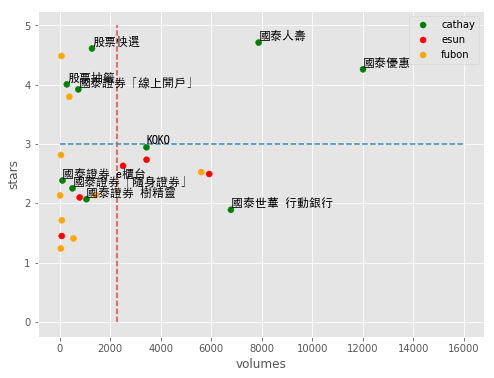

In [141]:
plt.style.use('ggplot')
myfont = FontProperties(fname=r'C:\Users\danie\OneDrive\Ê°åÈù¢\SimHei.ttf')

plt.figure(figsize=(8,6))

for df in vol_df.groupby(['c']):
    temp = df[1]
    label = df[0]
    plt.scatter(temp['vol'], temp['Star'], c=temp['color'], label=label)
    if label=='cathay':
        for name, x ,y in zip(df[1]['product'], df[1]['vol'], df[1]['Star']):
            plt.annotate(name, xy=(x,y), xytext = (x+0.1, y+0.05), fontproperties=myfont, size=12)
            
plt.xlabel('volumes')
plt.ylabel('stars')
plt.legend()
    
plt.plot( [vol_df['vol'].mean(),vol_df['vol'].mean()], [0,5],'--')
plt.plot( [0,16000], [3,3],'--')

In [143]:
dirPath = 'C:/Users/danie/OneDrive/Ê°åÈù¢/Update/'
result = [f for f in os.listdir(dirPath)]
print(result)

['KOKO.csv', 'ÂúãÊ≥∞‰∏ñËèØ Ë°åÂãïÈäÄË°å.csv', 'ÂúãÊ≥∞‰∫∫Â£Ω.csv', 'ÂúãÊ≥∞ÂÑ™ÊÉ†.csv', 'ÂúãÊ≥∞Ë≠âÂà∏ eÊ´ÉÂè∞.csv', 'ÂúãÊ≥∞Ë≠âÂà∏ Ê®πÁ≤æÈùà.csv', 'ÂúãÊ≥∞Ë≠âÂà∏„ÄåÁ∑ö‰∏äÈñãÊà∂„Äç.csv', 'ÂúãÊ≥∞Ë≠âÂà∏„ÄåÈö®Ë∫´Ë≠âÂà∏„Äç.csv', 'ËÇ°Á•®Âø´ÈÅ∏.csv', 'ËÇ°Á•®ÊäΩÁ±§.csv']


In [144]:
df = pd.DataFrame()
for p in result:
    temp = pd.read_csv(dirPath+p)
    temp['Product'] = p[:-4]
    df = pd.concat([df, temp], axis=0)

df = df.reset_index(drop = True)

df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%YÂπ¥%mÊúà%dÊó•").strftime('%Y/%m/%d'))

products = df['Product'].unique()

KOKO
2020/06/18
['Êõ¥Êñ∞', 'Ë≥áÊñô', 'ÁÑ°Ê≥ï', 'Á≥ªÁµ±', 'ÁôªÂÖ•', '‰ªÄÈ∫º']
['ÁàõÂà∞‰∏çË°åÔºåÁÇ∫‰∫ÜÊõ¥Êñ∞ÂÄã‰∫∫Ë≥áÊñôÔºåÁÑ°Ê≥ïÁôªÈåÑÁ∂≤ÈäÄ(ËÄå‰∏îÊòØÊüê‰∏ÄÂ§©Á™ÅÁÑ∂ËÆäÊõ¥ÔºåÂâçÂπæÂ§©ÈÇÑÂèØ‰ª•Áî®)Ôºå‰πü‰∏çÊèê‰æõÊñπÊ≥ïÔºåÊâæÂçäÂ§©Ôºå‰ª•Âæå‰∏çÊÉ≥Áî®‰∫ÜÔºåÊåáÁ¥ãÁôªÈåÑ‰πüÂª¢Ê≠¢ÔºåÁúüÁöÑÂæàÁàõ', 'È©óË≠âÁ≥ªÁµ±ÊúâÂæàÂö¥ÈáçÂïèÈ°å„ÄÇÂøòË®òÂØÜÁ¢ºÁöÑÁ¨¨‰∏ÄÊ≠•È©üÔºåÊòéÊòéËº∏ÂÖ•ÈÉΩÊ≠£Á¢∫Á≥ªÁµ±ÂçªÁÑ°Ê≥ïÊé•Âèó„ÄÇË®òÂæóÁï∂ÂàùÂâõÂÆâË£ù‰πüÊòØÔºåË∫´ÂàÜË≠âÂíåÁîüÊó•Ëº∏ÂÖ•Ê≠£Á¢∫ÔºåÁ≥ªÁµ±ÂçªË™™ÊúâÂïèÈ°åÔºåÂ•áÊÄ™ÔºåÊàëÊòØÁ¨¨‰∏ÄÊ¨°Áî≥Ë´ãËÄ∂ÔºüÔºÅ', 'Êõ¥Êñ∞ÂèàÈáçÁÅåÔºåÁ≥ªÁµ±ÈÇÑÊòØÊÖ¢Âà∞Âì≠Â∑¥ÔºåÊÄéÈ∫ºÂõû‰∫ãÔºå‰øÆÁêÜ‰∏Ä‰∏ãÂ•ΩÂóéÔºü']




<Figure size 432x288 with 0 Axes>

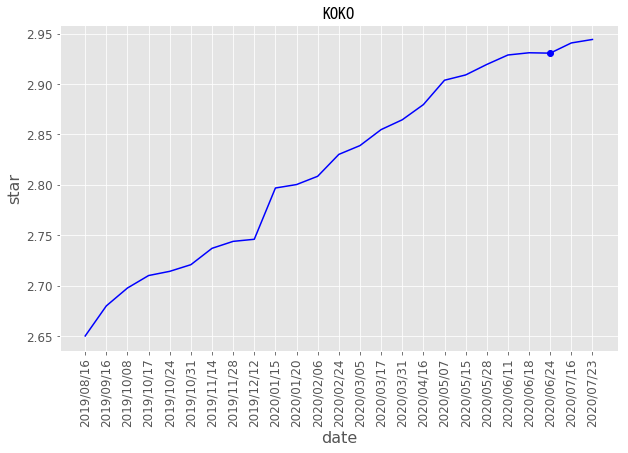

ÂúãÊ≥∞‰∏ñËèØ Ë°åÂãïÈäÄË°å
2019/09/20
['ËΩâÂ∏≥', 'ÁÑ°Ê≥ï', 'Êõ¥Êñ∞', 'app', 'ÁôªÂÖ•', '‰∏ÄÁõ¥']
['ËΩâÂ∏≥‰øÆ‰∏çÂ•ΩÊòØÊÄéÊ®£ÂØÑemailÁµ¶‰Ω†ÂÄëËë£‰∫ãÈï∑Áî≥Ë®¥', 'ÁàõÊõ¥Êñ∞ÂæåÂà∞ÁèæÂú®‰∏ÄÁõ¥Âç°‰Ωè ÂÆ≥ÊàëÈÄôÁ¶ÆÊãú‰∏ÄÁõ¥Ë∑ëATMÂåØÊ¨æÔºåÈÄ†Êàê‰∫ÜÈùûÂ∏∏Â§ßÁöÑÂõ∞Êìæ', 'ÁàõÁ∂≤Ë∑ØÈäÄË°åÁàõÈÄè‰∫ÜÔºåÁ≥ªÁµ±‰∏ÄÁõ¥Âá∫ÈåØÔºåÂåØÂÄãÈå¢ÈÉΩÊ≤íËæ¶Ê≥ï']
2019/11/06
['ÂØÜÁ¢º', 'ÁôªÂÖ•', 'ÈäÄË°å', 'ËΩâÂ∏≥', 'app', 'Ë®≠ÂÆö']
['ÊÑàÊîπÊÑàÁ≥üÁ≥ï Ê∂àË≤ªË®äÊÅØÁ´üÁÑ∂Âú®‰∏ÄÂÄãÂ§öÂ∞èÊôÇÂæåÊâçÈÄöÁü• Ëê¨‰∏ÄË¢´ÁõúÂà∑‚Ä¶‰∫∫ÈÉΩË∑ë‰∫Ü', 'Ë®≠Ë®à‰∏çËâØÂ∏∏Â∏∏Ë¶ÅÈáçÊñ∞Ë®≠ÁΩÆÂ∏≥ËôüÂØÜÁ¢ºÔºåÊîπÂà∞ÊàëËá™Â∑±ÈÉΩË®ò‰∏çËµ∑‰æÜ ÂæàÈ∫ªÁÖ©Ê¨∏', 'Â∏≥Êà∂È§òÈ°çÁ™ÅÁÑ∂ËÆä0Êï¥ÂÄãÂÇªÁúº Êü•Á∂≤Ë∑ØÈäÄË°åÊòéÊòéÂ∞±ÈÇÑÊúâÈå¢']
2020/06/08
['ÁôªÂÖ•', 'Êõ¥Êñ∞', 'ÁÑ°Ê≥ï', 'ÈñãÊ≠§', 'app', 'Èõ£Áî®']
['Èõ£Áî®ÂèØ‰ª•Êõ¥Êîπ‰∏Ä‰∏ãÂóéÈõ£Áî®', '‰∏çÁü•ÈÅìÂú®ÁàõÁîöÈ∫ºÂø´ÈªûÊîπÈÄ≤ÂìÅË≥™', 'Â£û‰∫ÜÂÆåÂÖ®Â£û‰∫ÜÈÇ£Â§©ÂéªÈäÄË°åÔºåÈÄ£ÈäÄË°åÂà∑Á∞øÂ≠ê„ÄÅ‰∫§ÊòìÈÉΩÊéõ‰∫ÜÔºåÈÇÑË¶Å‰ªÄÈ∫ºÂúñÔºüÂïèÂïèË°åÂì°ÂêßÔºÅ']




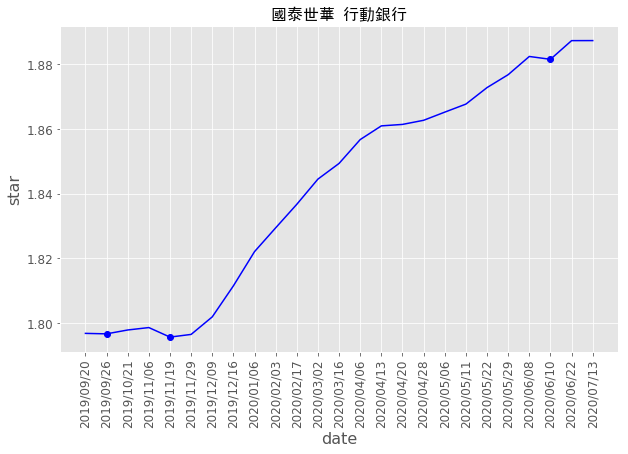

ÂúãÊ≥∞‰∫∫Â£Ω
2018/08/27
['ÈõªË©±', 'app', 'ÊôÇÈñì', 'ÁÑ°Ê≥ï', 'Ë®àÊ≠•', 'ÂúãÊ≥∞‰∫∫Â£Ω']
['‰ªäÂ§©Ë¶ÅÁôªÂÖ•Êõ¥Êñ∞Ê≠•Êï∏ ÂøΩÁÑ∂È°ØÁ§∫‰∏ÄÂ†Ü‰∫ÇÁ¢º ÊúÄ‰∏äÈù¢ÂØ´Ê†ºÂºèÈåØË™§ Ë´ãÂïèÊÄéÈ∫ºÂõû‰∫ã', 'Ë∂ÖÈõ£Áî®ÂØÜÁ¢ºÂ∑≤Á∂ìÈÉΩÂø´ÂøòË®ò‰∫ÜÈÇÑË¶ÅÂÖ≠ÂÄãÊúàÊèõ‰∏ÄÊ¨°ÔºåÂêÉÈ£ΩÈñíËëóÂóéÔºü', 'ÊàëÊõ¥Êñ∞fitÂæåÂ∞±ÁÑ°Ê≥ïË®àÊ≠•‰∫ÜÔºåÊâÄ‰ª•ÂúãÊ≥∞‰∫∫Â£Ωapp‰∏ÄÁõ¥È°ØÁ§∫0Ôºå‰ΩÜÊòØÁî®Samsung healthÂçªÈÇÑÊòØÂèØ‰ª•Ë®àÊ≠•ÔºåÂïèÈ°åÂà∞Â∫ïÂá∫Âú®Âì™ÔºåÊµ™Ë≤ªÊàëÂ•ΩÂ§öÊôÇÈñì~~']
2018/09/02
['app', 'Á∞ΩÊî∂', 'Á∂≤Á´ô', 'ÈåØË™§', 'ÈÄôÈ∫º', 'Ë®àÊ≠•']
['ÊòéÊòéÊòØÈõªÂ≠êÂåñÊúçÂãôÔºå‰ΩÜÂçªÊØîÁ¥ôÁ≠ÜÁ∞ΩÊî∂ÈÇÑË¶ÅÈ∫ªÁÖ©ÔºåÈõªÂ≠êÁ∞ΩÊî∂Á∂≤Á´ôÈÇÑÊòØÈåØË™§ÁöÑÔºåÈÇÑ‰∏çËÉΩÁî®GoogleÊâæÁ∂≤Á´ôÔºåÂè™ËÉΩÁî®chromeÔºåÂèØ‰ª•ÊîπÈÄ≤ÂóéÔºüÊµ™Ë≤ªÊôÇÈñìÔºåÊïóÂ£ûÂúãÊ≥∞ÂêçË≠Ω', 'ÂâõÊâìÈñãÂ∞±Ê†ºÂºèÈåØË™§ÊòØÊÄéÔºüüôÑ', 'ÂâõÊâìÈñãÂ∞±Ê†ºÂºèÈåØË™§ÊòØÊÄéÔºüüôÑ']
2018/09/13
['APP', 'ÈÄôÈ∫º', 'ÊâãÊ©ü', 'Êõ¥Êñ∞', 'ÁµêÊûú', 'È°ØÁ§∫']
['Ëµ∞Ë∑ØÈ®ô‰∫∫Ê≠•Êï∏Ê†πÊú¨Áï∞Â∏∏ÂïäÔºåÊõ¥Êñ∞‰πü‰∏çÂç≥ÊôÇÔºåÂíåÂÅ•Â∫∑ÁöÑÊï∏ÊìöÂÆåÂÖ®‰∏ç‰∏ÄÊ®£Ôºå‰∏äÈÄ±Â∑≤Á∂ìÈÅîÊ®ô‰πüÊ≤íÈÄÅÁçéÂãµÔºåÈ

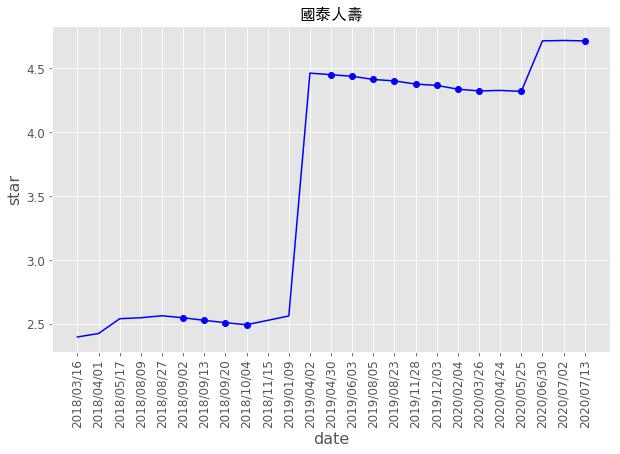

ÂúãÊ≥∞ÂÑ™ÊÉ†
2019/01/24
['ÁÑ°Ê≥ï', 'app', 'ÁôªÂÖ•', 'Êõ¥Êñ∞', 'ÈñãÂïü', 'Êâì‰∏çÈñã']
['Âìá~ÊàëÁöÑÁãÄÊ≥ÅË∑üÊúÄËøë‰∏Ä‰∫õ‰∫∫ÁöÑÂèçÊò†‰∏ÄÊ®£ÔºåÁÑ°Ê≥ïÈÄ≤ÂÖ•Èñã‰∏ç‰∫ÜÔºåÁúüÂ•áÊÄ™ÔºÅ', 'ÁÇ∫‰ªÄÈ∫ºÊúÉÂì°Áôª‰∏çÁôÇ', 'ÈÉΩÊ≤í‰ªÄÈ∫ºÂÑ™ÊÉ†ÔºåÂè™Â•ΩÂà™Èô§app‰∫Ü']
2019/03/11
['ÂÖåÊèõ', 'Á≥ªÁµ±', 'ÁÑ°Ê≥ï', 'Êõ¥Êñ∞', 'ËôïÁêÜ', 'Ëº∏ÂÖ•']
['Ê≤íÊúâÂà∑Âç°Ê∂àË≤ªÊòéÁ¥∞È†ÖÁõÆÂèØ‰ª•Êü•Ë©¢', '50ÂÖÉÂÖåÂà∏ ‰∏≠ÊùØÁæéÂºè 3/31ÈÅìÊúü ‰∏çËÉΩ‰ΩøÁî®APPÂÖåÊèõ Âà∞ÂÖ®ÂÆ∂Ëº∏ÂÖ•14‰ΩçpinÁ¢ºÂèàÈ°ØÁ§∫Â∑≤ÂÖåÊèõ ÁÑ°Ê≥ïÂàóÂç∞ Ë´ãÁõ∏Èóú‰∫∫Âì°ÂçîÂä©ËôïÁêÜ', '‰∏ÄÁõ¥Âú®Êõ¥Êñ∞Â∑≤Á∂ì‰∏ÄÂÄãÁ¶ÆÊãúÂæûÊó©‰∏äÂà∞Êôö‰∏äÊâìÈñã‰æÜÁúãÈÉΩÂØ´Á≥ªÁµ±Êõ¥Êñ∞ÔºåÈåØË™§Ôºà310Ôºâ']
2019/04/02
['ÁÑ°Ê≥ï', 'ÁôªÂÖ•', 'Ê¥ªÂãï', 'Á≥ªÁµ±', 'app', 'È°ØÁ§∫']
['serverÂõûÊáâÈÄüÂ∫¶Â§™ÊÖ¢', 'ÁôªÂÖ•ÈÄüÂ∫¶ÂæàÊÖ¢ÔºåÁ≥ªÁµ±‰πüÂ∏∏Â∏∏Âá∫ÂïèÈ°å', 'serverÂõûÊáâÈÄüÂ∫¶Â§™ÊÖ¢']
2019/06/04
['app', 'ÁÑ°Ê≥ï', 'Êõ¥Êñ∞', '‰ªÄÈ∫º', 'ÁôªÂÖ•', 'ÂïèÈ°å']
['‰ªÄÈ∫ºÁàõApp ‰ªÄÈ∫ºË∫´‰ªΩÂ≠óËôü‰∏çÂ≠òÂú® ÊòéÊòéÊòØÊàëÁöÑË∫´ÂàÜ Ë≠âÂ≠óËôüÁÇ∫‰ªÄÈ∫º‰∏çËÉΩÁôªÂÖ•', 'Êï¥Â§©Êõ¥Êñ∞‰∏ç‰∫Ü! Ë¶ÅÊÇÖÊèõÁöÑÊù±Ë•øÔ

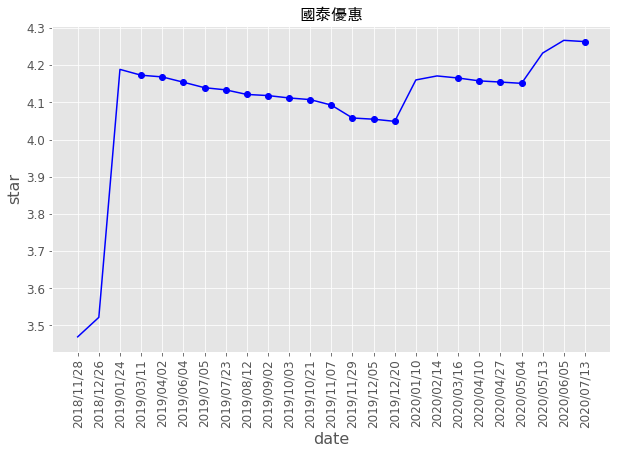

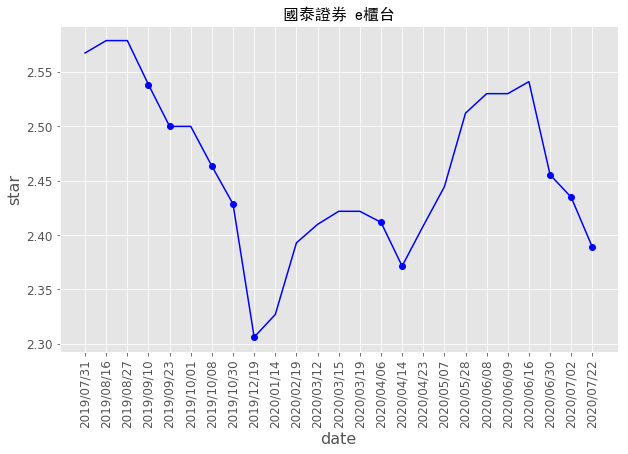

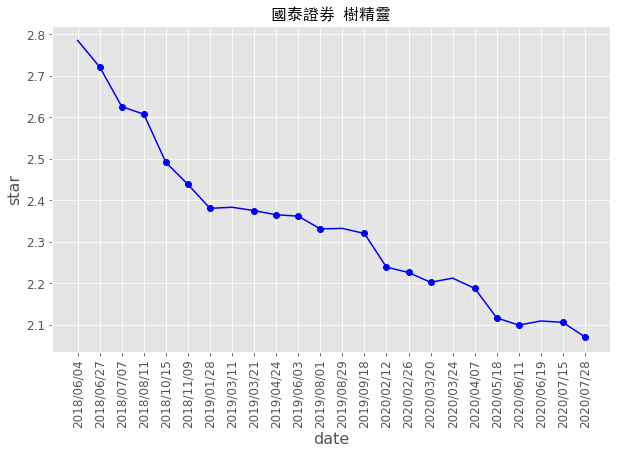

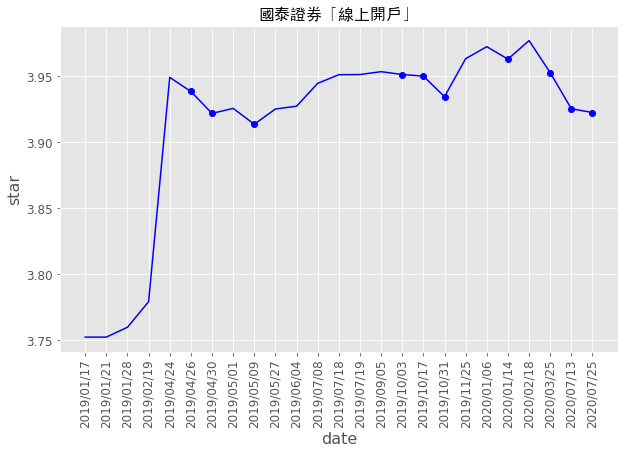

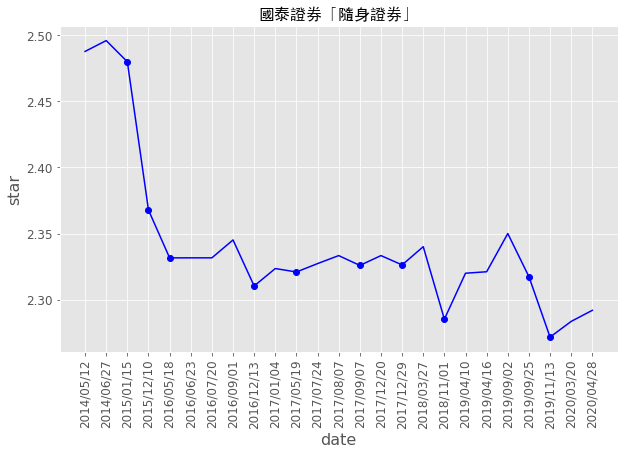

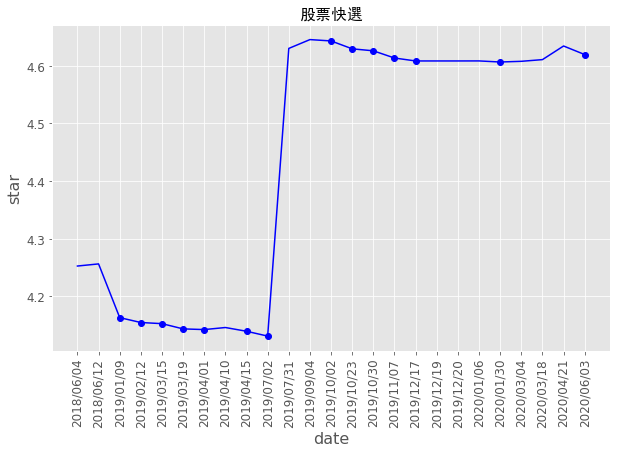

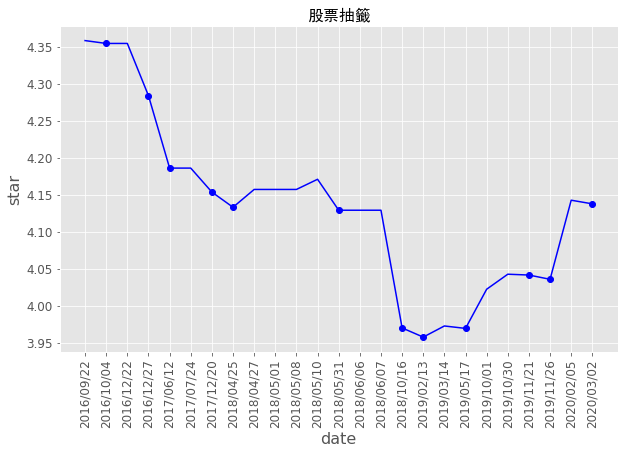

In [155]:
# fig,ax = plt.subplots(5, 2, figsize=(20,30))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=.5)
myfont = FontProperties(fname=r'C:\Users\danie\OneDrive\Ê°åÈù¢\SimHei.ttf')

for i in range(len(products)):
    datelist = df[df['Product']==products[i]]['Date']
    datelist = datelist.sort_values().reset_index(drop=True)
    subset = raw_data[raw_data['product'] == df['Product'].unique()[i]]
    update_star = [(subset[subset['Time']<datelist[i]]['Star'].mean(), datelist[i]) for i in range(len(datelist))]
    update_star = pd.DataFrame(update_star)
    update_star.columns = ['star', 'date']
    update_star['label'] = update_star['star'].shift(-1)
    update_star['label'] = (update_star['label']<update_star['star']).values.astype(int)
    update_star['label'] = update_star['label'].shift(1).fillna(0)
    update_star['product'] = products[i]
      
    if i<4:
        comments = []
        print(products[i])
        for date_idx in np.nonzero(update_star['label'].values==1)[0]:
            print(update_star['date'].tolist()[date_idx-1])
            comment = subset[(subset['Time']>=update_star['date'][date_idx-1])&(subset['Time']<update_star['date'][date_idx])&(subset['Star']<3)]['Content'].values
            print(jieba.analyse.extract_tags(reduce(operator.concat, comment.tolist()), topK=6, withWeight=False, allowPOS=()))
            comments.append(comment)
            print(random.choices(comment, k=3))
        print('\n')
    
    markers_on=np.nonzero(update_star['label'].values)[0]
    fig,ax = plt.subplots(1, 1, figsize=(10,6))
#     ax = plt.subplot(5, 2, i+1)
    ax = plt.subplot(1, 1, 1)
    plt.title(products[i],  fontproperties=myfont, size=16)
    plt.plot(update_star['date'], update_star['star'], '-bo', markevery=markers_on.tolist())
    plt.xlabel('date', size=16)
    plt.ylabel('star', size=16)
    plt.xticks(rotation=90, size=12)
    plt.yticks(size=12)

    plt.show()


In [ ]:
cc = OpenCC('t2s')

raw_data['Content'] = raw_data['Content'].apply(lambda x: cc.convert(x))

In [ ]:
jieba.suggest_freq( '‰ø°Áî®Âç°Ë¥π', True)
jieba.suggest_freq( '‰∏ä‰∏ÄÊ¨°', True)
jieba.suggest_freq( 'ËΩ¨Âá∫', True)

In [ ]:
# Âà™ÊéâËã±ÊñáË∑üÊï∏Â≠ó
raw_data['Content'] = raw_data['Content'].str.replace("[a-zA-Z#]", "")

In [ ]:
raw_data['Content'] = raw_data['Content'].apply(lambda x: [y for y in jieba.cut(x , cut_all=False)])

In [ ]:
stopwords = pd.read_csv(r'C:\Users\danie\OneDrive\Ê°åÈù¢\cn_stopword.txt', delimiter='\t')
stopwords = [word for word in stopwords['words']]
stopwords.append(" ")

In [ ]:
raw_data['Content'] = raw_data['Content'].apply(lambda x: [w for w in x if w not in stopwords])

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(raw_data['Content'].tolist(), min_count=5, threshold=50) # higher threshold fewer phrases.

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [ ]:
raw_data['Content'][:10].apply(lambda x: bigram_mod[x])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(raw_data['Content'])

In [ ]:
# Term Document Frequency
# converts the word to its integer word id and returns the result as a sparse vector.
corpus = [id2word.doc2bow(text) for text in raw_data['Content']]